# 0. Read the files

In [13]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from scipy.stats.mstats import mquantiles
from scipy.spatial.distance import pdist,squareform

#read data
path_file_system_activities = './local_activity_data/file-system-activities/'
path_api_calls = './local_activity_data/api-calls/'
path_system_calls = './local_activity_data/system-calls/'
files_file_system_activities = glob.glob(os.path.join(path_file_system_activities, '*.txt'))
files_api_calls = glob.glob(os.path.join(path_api_calls, '*.txt'))
files_system_calls = glob.glob(os.path.join(path_system_calls, '*.txt'))

d_file_system_activities = []
d_api_calls = []
d_system_calls = []


#file system activities
for file in files_file_system_activities[:]:
    print(file)
    url = os.path.basename(file).split('.')[0][:-23]
    url = url.split('_')[1]
        
    with open(file, 'r') as f:
        Lines = f.readlines()
        for line in Lines:
            line_splitted = line.split(' ')
            if len(line_splitted) == 3:
                file_system_activities = ';'.join(line_splitted[1:])
            d_file_system_activities.append({'url': url, 'file_system_activities': file_system_activities})

df_file_system_activities = pd.DataFrame(d_file_system_activities)

#api-calls
for file in files_api_calls[:]:
    url = os.path.basename(file).split('.')[0][:-10]
    url = url.split('_')[1]
        
    with open(file, 'r') as f:
        Lines = f.readlines()
        for line in Lines:
            api_call = line 
            d_api_calls.append({'url': url, 'api_calls': api_call})

df_api_calls = pd.DataFrame(d_api_calls)


#system-calls
for file in files_system_calls[:]:
    url = os.path.basename(file).split('.')[0][:-13]
    url = url.split('_')[1]
    
    with open(file, 'r') as f:
        Lines = f.readlines()
        for line in Lines:
            system_call = line.split('(')[0]
            d_system_calls.append({'url': url, 'system_calls': system_call})

df_system_calls = pd.DataFrame(d_system_calls)

#df_file_system_activities.head()
#df_api_calls.head()
df_system_calls.head()
                    

./local_activity_data/file-system-activities/9_text-editor_file_system_activities.txt
./local_activity_data/file-system-activities/6_glitch_file_system_activities.txt
./local_activity_data/file-system-activities/1_github_file_system_activities.txt
./local_activity_data/file-system-activities/12_RoBReordered_file_system_activities.txt
./local_activity_data/file-system-activities/2_vscode_file_system_activities.txt
./local_activity_data/file-system-activities/3_photopea_file_system_activities.txt
./local_activity_data/file-system-activities/14_RoBBothWait_file_system_activities.txt
./local_activity_data/file-system-activities/11_RobEncHundred_file_system_activities.txt
./local_activity_data/file-system-activities/4_excalidraw_file_system_activities.txt
./local_activity_data/file-system-activities/10_RobEncOne_file_system_activities.txt
./local_activity_data/file-system-activities/7_bangle_file_system_activities.txt
./local_activity_data/file-system-activities/13_RoBWithBenAPI_file_system

,url,system_calls
0,RoBBothWait,futex
1,RoBBothWait,futex
2,RoBBothWait,lseek
3,RoBBothWait,read
4,RoBBothWait,lseek


In [6]:
#mean
df_file_system_activities['url'].value_counts().mean()

15324.764705882353

In [7]:
#mean
df_api_calls['url'].value_counts().mean()

32.88235294117647

In [8]:
#mean
df_system_calls['url'].value_counts().mean()

7588.117647058823

# 1. File System Activities Analysis

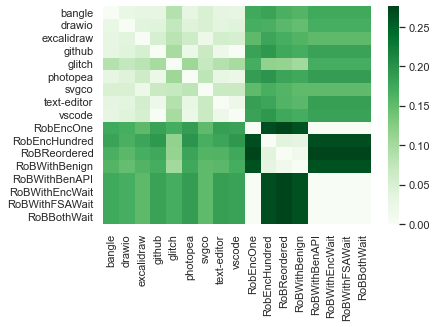

In [14]:
d_features_file_system_activities = [] 
for url in df_file_system_activities['url'].unique():
    
    #filter for the given url
    all_words = df_file_system_activities[df_file_system_activities.url == url]['file_system_activities'].to_list()
    
    #1-gram calculation
    top_bi_grams = pd.Series(nltk.ngrams(all_words, 1)).value_counts()
    
    #10% quantile calculation
    a = top_bi_grams/top_bi_grams.sum()
    f = mquantiles(a, prob=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    
    #feature conversion
    d_features_file_system_activities.append({'url': url, 'f1': f[0], 'f2': f[1], 'f3': f[2], 'f4': f[3],'f5': f[4],'f6': f[5], 'f7': f[6], 'f8': f[7],
             'f9': f[8]})

#array to dataframe conversion
df_features_file_system_activities = pd.DataFrame(d_features_file_system_activities)

#set url as index and sort and drop the old index
df_features_file_system_activities.set_index('url',inplace=True)
df_features_file_system_activities.sort_index(inplace=True)
df_features_file_system_activities.index.name = None

# calculate similarity matrix
sim_matrix_file_system_activities = pdist(df_features_file_system_activities,'euclidean')

#data to plot
df_plot = pd.DataFrame(squareform(sim_matrix_file_system_activities), index=df_features_file_system_activities.index, columns= df_features_file_system_activities.index)

#adjust the axis ticks
order_array = ['bangle', 'drawio', 'excalidraw', 'github', 'glitch', 'photopea', 
               'svgco', 'text-editor', 'vscode', 'RobEncOne','RobEncHundred', 'RoBReordered', 'RoBWithBenign',
               'RoBWithBenAPI', 'RoBWithEncWait', 'RoBWithFSAWait','RoBBothWait']
df_sorted = df_plot.loc[order_array, order_array]

#plot
sns.set(font_scale=1)
sns.heatmap(df_sorted, cmap="Greens")
plt.show()


# 2. FSA API Function Calls

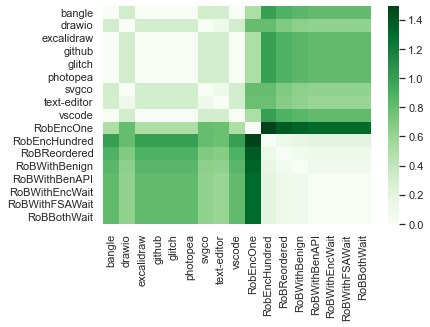

In [10]:
d_features_api_calls = [] 
for url in df_api_calls['url'].unique():
    
    all_words = df_api_calls[df_api_calls.url == url]['api_calls'].to_list()
    top_bi_grams = pd.Series(nltk.ngrams(all_words, 2)).value_counts()
    a = top_bi_grams/top_bi_grams.sum()
    
    f = mquantiles(a, prob=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    d_features_api_calls.append({'url': url, 'f1': f[0], 'f2': f[1], 'f3': f[2], 'f4': f[3],'f5': f[4],'f6': f[5], 'f7': f[6], 'f8': f[7],
             'f9': f[8]})

df_features_api_calls = pd.DataFrame(d_features_api_calls)

df_features_api_calls.set_index('url',inplace=True)
df_features_api_calls.sort_index(inplace=True)

df_features_api_calls.index.name = None

sim_matrix_api_calls = pdist(df_features_api_calls,'euclidean')

df_plot= pd.DataFrame(squareform(sim_matrix_api_calls), index=df_features_api_calls.index, columns= df_features_api_calls.index)


order_array = ['bangle', 'drawio', 'excalidraw', 'github', 'glitch', 'photopea', 
               'svgco', 'text-editor', 'vscode', 'RobEncOne','RobEncHundred', 'RoBReordered', 'RoBWithBenign',
               'RoBWithBenAPI', 'RoBWithEncWait', 'RoBWithFSAWait','RoBBothWait']

df_sorted = df_plot.loc[order_array, order_array]

# Plot the sorted heatmap
sns.set(font_scale=1)
sns.heatmap(df_sorted, cmap="Greens")
#plt.title("FSA API Function Calls Heatmap")
plt.show()

# 3. System Calls

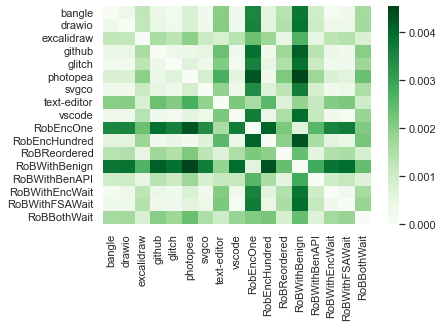

In [11]:
d_features_system_calls = [] 
for url in df_system_calls['url'].unique():
    
    all_words = df_system_calls[df_system_calls.url == url]['system_calls'].to_list()
    top_bi_grams = pd.Series(nltk.ngrams(all_words, 4)).value_counts()
    a = top_bi_grams/top_bi_grams.sum()
    
    f = mquantiles(a, prob=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    d_features_system_calls.append({'url': url, 'f1': f[0], 'f2': f[1], 'f3': f[2], 'f4': f[3],'f5': f[4],'f6': f[5], 'f7': f[6], 'f8': f[7],
             'f9': f[8]})

df_features_system_calls = pd.DataFrame(d_features_system_calls)

df_features_system_calls.set_index('url',inplace=True)
df_features_system_calls.sort_index(inplace=True)

df_features_system_calls.index.name = None

sim_matrix_system_calls = pdist(df_features_system_calls,'euclidean')

df_plot= pd.DataFrame(squareform(sim_matrix_system_calls), index=df_features_system_calls.index, columns= df_features_system_calls.index)

order_array = ['bangle', 'drawio', 'excalidraw', 'github', 'glitch', 'photopea', 
               'svgco', 'text-editor', 'vscode', 'RobEncOne','RobEncHundred', 'RoBReordered', 'RoBWithBenign',
               'RoBWithBenAPI', 'RoBWithEncWait', 'RoBWithFSAWait','RoBBothWait']

df_sorted = df_plot.loc[order_array, order_array]

# Plot the sorted heatmap
sns.set(font_scale=1)
sns.heatmap(df_sorted, cmap="Greens")
#plt.title("FSA API Function Calls Heatmap")
plt.show()